# Deep learning from scratch: homework 2

### General instructions

Complete the exercises listed below in this Jupyter notebook - leaving all of your code in Python cells in the notebook itself.  Feel free to add any necessary cells.

#### <span style="color:#a50e3e;">Exercise 1. </span>   Perform two-class classification on a toy dataset

Code up the two-class logistic regression / softmax cost function, using gradient descent to minimize.  You should use the two class toy dataset in the file called *3d_classification_data_v2.csv*.

Create a plot with two panels that shows the number of misclassifications at each gradient descent step (in the left panel), and one that compares the cost function at each gradient descent step (in the right panel).  You won't get perfect separation - but you should be able to separate most of the points.

In [3]:
#Imports and Other Things
import autograd.numpy as np   
import matplotlib.pyplot as plt
from autograd import grad    

In [17]:
#Gradient Descent from HW 1
# gradient descent function - inputs: g (input function), alpha (steplength parameter), max_its (maximum number of iterations), w (initialization)
def gradient_descent(g,alpha,max_its,w):
    # compute the gradient of our input function - note this is a function too!
    gradient = grad(g)
    #array for the weight history
    weight_history = []
    #Append the initial weight
    weight_history.append(w)

    # run the gradient descent loop
    best_w = w        # weight we return, should be the one providing lowest evaluation
    best_eval = g(w)       # lowest evaluation yet
    for k in range(max_its):
        # evaluate the gradient
        grad_eval = gradient(w)

        # take gradient descent step
        w = w - alpha*grad_eval
        
        #Append at each step of gradient descent 
        weight_history.append(w)
        
        # return only the weight providing the lowest evaluation
        test_eval = g(w)
        if test_eval < best_eval:
            best_eval = test_eval
                     
    #return the weight history        
    return weight_history

#Cost Function History output modified from  from HW1
def cost_history(weight_history,g):
    out = []
    # loop over weight history and compute associated cost function history at each step
    for w in weight_history:
        out.append(g(w))
    return out


In [18]:
#Import the data
csvname = '3d_classification_data_v2.csv'
data = np.loadtxt(csvname,delimiter = ',')

#Seperate it into vectors 
x = data[:,:-1]
y = data[:,-1]

#Define the model

def model(x,w):
    a = w[0] + np.dot(x,w[1:])
    return a.T

In [19]:
#Softmax function (it's convex!) Realization
def softmax(w):
    g = np.sum(np.log(1+np.exp(-1.0*y*model(x,w))))
    return g/float(np.size(y))

In [20]:
#Init the weights
w = np.random.randn(1,np.shape(x)[1]+1)[0]

#Minimization
#Alpha = 1
#1000 Iterations 
w_hx = gradient_descent(softmax, 1.0, 1000, w)

In [21]:
#Misclassification function 
def missclass(model, w_hx, x, y):
    #History var
    missclass_hx = []
    sgns = []
    
    #Test the fit with x and the model fit and the model
    for w in w_hx:
        #Get the signs of the variables (we only care about those here)
        sgns = np.sign(model(x,w))
        #Count the number of missclassified variables
        mcs = np.sum(1.0 - np.equal(sgns, y))
        #Append misclassifications
        missclass_hx.append(mcs)
        
    return missclass_hx

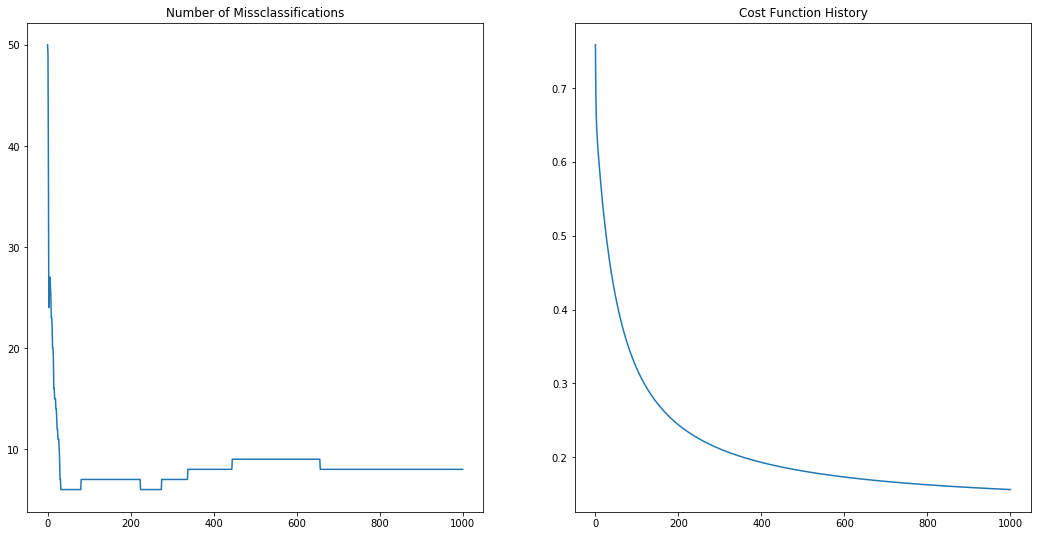

In [22]:
#Plots (One Plot for each misclassification and cost function history)
#Get the data for both
mc = missclass(model, w_hx, x,y)
cfxhx = cost_history(w_hx, softmax)

#Number of iterations
its = np.arange(0,len(w_hx))

# plot cost function history
fig, ax = plt.subplots(1, 2, figsize=(18,9))

# plot function and gradient values
ax[0].plot(its,mc)
ax[0].set_title("Number of Missclassifications")
ax[1].plot(its,cfxhx)
ax[1].set_title("Cost Function History")

plt.show()

#### <span style="color:#a50e3e;">Exercise 2. </span>   Perform two-class classification on a breast cancer dataset

Use the softmax cost function to classify healthy from cancerous tissue using the dataset located in breast_cancer_dataset.csv (included in this homework folder).  You can examine the description of this dataset [here](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)). 

There are $N = 8$ input dimensions to the input of this dataset (these are the first $N = 8$ columns of the breast_cancer_dataset.csv, the last column are the associated labels).  Fit using gradient descent using a maximum of 5,000 iterations.  You should be able to reach a point on the surface where you misclassify less than 30 examples.

**Note:** Python is a great prototyping language but [it is slow](http://jakevdp.github.io/blog/2014/05/09/why-python-is-slow/), particular when evaluating explicit for loops.  If you are having speed issues try re-writing the softmax cost function using as few explicit for-loops as possible (you can indeed write the entire summation in a single line of Python code, for-loop free).

In [23]:
# we reuse the imports, we have the functions for:
# -- Softmax
# -- Gradient Descent
# -- Number of Misclassifications
# -- Cost Function History
# -- The Model 

#Here, we import the new data. 
csvname = 'breast_cancer_data.csv'
data = np.loadtxt(csvname,delimiter = ',')

#Seperate it into vectors 
x = data[:,:-1]
y = data[:,-1]

#Init the weights
w = np.random.randn(1,np.shape(x)[1]+1)[0]

In [24]:
#Now, we run gradient descent again using 5000 its as states above
w_hx = gradient_descent(softmax, 0.10, 5000, w)

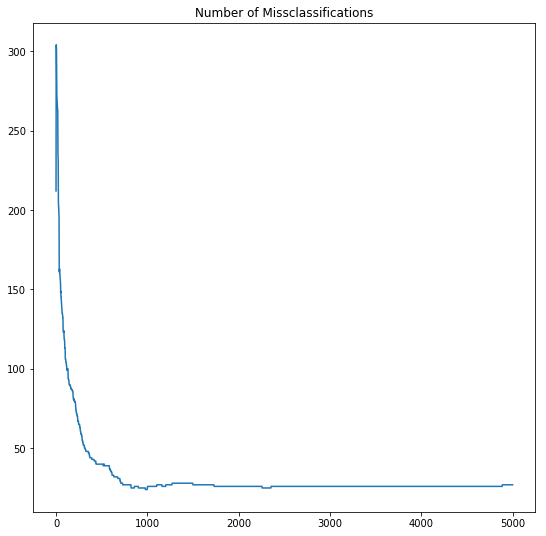

Number of misclassifications at conclusion of gradient descent is:  27.0


In [25]:
#Aaaand we plot the number of misclassifications
mc = missclass(model, w_hx, x, y)
its = np.arange(0,len(w_hx))

# plot cost function history
fig, ax = plt.subplots(1, 1, figsize=(9,9))

# plot function and gradient values
ax.plot(its,mc)
ax.set_title("Number of Missclassifications")
plt.show()

#Finally, print the number 
print("Number of misclassifications at conclusion of gradient descent is: ", mc[-1])

#### <span style="color:#a50e3e;">Exercise 3. </span>   Code up One-versus-All multiclass classification

Using the toy $C = 3$ class dataset located in *3class_data.csv* - code up One-Versus-All classification, using this toy dataset to test out your code.  You should be able to learn a model that perfectly separates this data - as shown in class.  You may use your softmax cost / gradient descent code here for each of the two-class subproblems! 

In [26]:
# we reuse the imports, we have the functions for:
# -- Gradient Descent
# -- Cost Function History
# -- The Model 

#We need to make a new function for misclassifications for this and the next problem

#Here, we import the new data. 
csvname = '3class_data.csv'
data = np.loadtxt(csvname,delimiter = ',')

#Seperate it into vectors 
x = data[:,:-1]
y = data[:,-1]

#Init the weights
w = np.random.randn(1,np.shape(x)[1]+1)[0]

#Number of Iterations
num_its = 10000

In [27]:
#Softmax function (it's convex!) Realization
#New implementation as y is changing on every it of the loop below. 
def softmax(w):
    #Instead of "y", we now have "new_out"
    g = np.sum(np.log(1+np.exp(-1.0*new_out*model(x,w))))
    return g/float(np.size(new_out))

In [28]:
#Storage for entire cost history 
cost_hx = np.ones((3,num_its+1)) 

#Storage for missclass history
misclass = np.ones((3,num_its+1))

#The weights for fusion
KappaW = np.ones((3,np.shape(x)[1]+1))

for j in range(1,4):
    # --- Temporary Labels --- 
    #Grab indicies of the term
    pos = np.where(y == j)[0]
    #New "y", or output array 
    new_out = -1.0*np.ones(len(y))
    #Make all values not in the pos array negative
    for idx in pos:
        new_out[idx] = 1.0
    
    #New out is now the y used in the two-class problem
    # --- Two-Class Subproblem ---
    #Init the weights
    w = np.random.randn(1,np.shape(x)[1]+1)[0]
    
    #Now, we run gradient descent again using 5000 its as states above
    w_hx = gradient_descent(softmax, 0.10, num_its, w)
    
    #Misclassification History
    misclass[j-1,:] = missclass(model, w_hx, x, new_out)
    
    #Costfunction History
    cost_hx[j-1,:] = cost_history(w_hx, softmax)
    
    #Store the best, normalized weight in KappaW
    KappaW[:,j-1] = w_hx[-1]#/np.linalg.norm(w_hx[-1])

In [29]:
#Solve the problem (essentially, run gradient descent using the methods in p1 and p2) using the fusion rule
output = []
#find the index of the largest value. This index cooresponds to a set of weights which are unique to a given 
#output/classification. The index IS the classification (well classification-1, but close enough)
def fusion_rule(x,w):
    return np.argmax(model(x,w)) + 1

#Run the classification and store
for xes in x:
    output.append(fusion_rule(xes,KappaW))

#Find number of missclassifications using the fusion rule and print
mc = np.sum(1.0 - np.equal(output, y))
print("Number of points misclassified using the fusion rule: ", mc)

Number of points misclassified using the fusion rule:  0.0


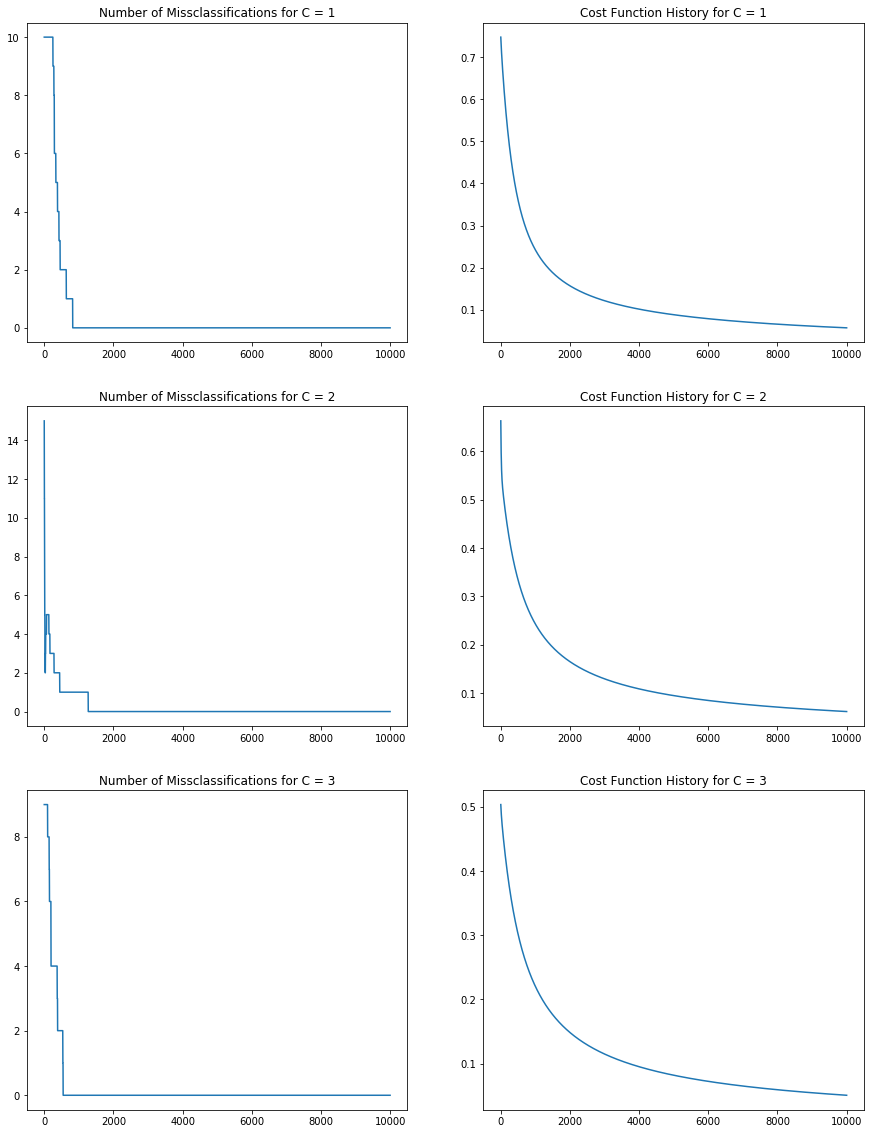

In [32]:
#Plot the misclassifications and cost function histories for each two-part problem
#plot cost function history

fig, ax = plt.subplots(3, 2, figsize=(15,20))
its = np.arange(0,len(cost_hx[0,:]))

for i in range(0,3):
    ax[i,0].plot(its,misclass[i,:])
    ax[i,0].set_title("Number of Missclassifications for C = " + str(i+1))
    ax[i,1].plot(its,cost_hx[i,:])
    ax[i,1].set_title("Cost Function History for C = " + str(i+1))
plt.show()

#### <span style="color:#a50e3e;">Exercise 4. </span>   A nonlinear two-class dataset

Propose a nonlinear feature transformation and integrate it into your two-class classification scheme in order to adequately classify the dataset shown below - located in the file *bricks.csv'.  With the right transformation you should be able to classify this quite well.

<p>
  <img src= 'brick_pick.png' width="40%" height="40%" alt=""/>
</p>

In [33]:
#Redefine softmax function - we want the old version
def softmax(w):
    g = np.sum(np.log(1+np.exp(-1.0*y*model(x,w))))
    return g/float(np.size(y))

Text(0.5,1,'Input, Harder-to-Seperate-and-Classify Data Plot')

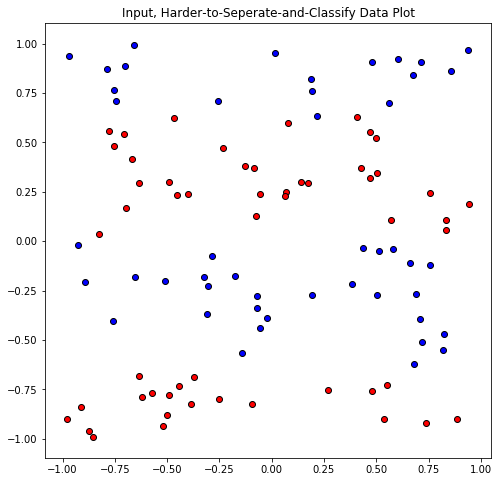

In [34]:
#Read in the data and make a plot
#Here, we import the new data. 
csvname = 'bricks.csv'
data = np.loadtxt(csvname,delimiter = ',')

#Seperate it into vectors 
x = data[:,:-1]
y = data[:,-1]

#Plot the non-transformed data
fig, ax = plt.subplots(1, 1, figsize=(8,8))
#Type 1
ax.scatter(data[np.where(y == 1),0],data[np.where(y == 1),1],color = 'r',edgecolor = 'k')
#Type 2
ax.scatter(data[np.where(y == -1),0],data[np.where(y == -1),1],color = 'b',edgecolor = 'k')
ax.set_title("Input, Harder-to-Seperate-and-Classify Data Plot")

In [42]:
#We observe the data us uniform along x0 and not along x1. We need a transformation for x1, only. 
#To be safe, we can apply it to both 
#We expand the dot product to get w0 + x0w1 + x1w2
#Applying the transformation: w1 + f(x0,w)w1 + f(x1,w)w2
#x1 appears to be third order polynomial, so it follows: f(x,w) = x**3w[0]+x**2w[1]+x**1w[2]+w[3]

#Define the model with the transformation 
def model(x,w):
    #We only need the transform on the second column of data. 
    a = w[0] + f(x[:,0],w[3:7])*w[1] + f(x[:,1],w[7:])*w[2]
    return a.T

#Define the transformation 
def f(x,w):
    return w[0]*x**3 + w[1]*x**2 + w[2]*x + w[3]
    
#Define initial points (one per external weight (3) + 2(num of x points)*4(weights in 3rd order func)) = 11
#x[0,:] = 2, 2+0 == 11
w = np.random.randn(1,np.shape(x)[1]+9)[0]

#define alpha, num its
alpha = 0.1
num_its = 10000

In [43]:
#Decend the gradient
w_hx = gradient_descent(softmax, alpha, num_its, w)

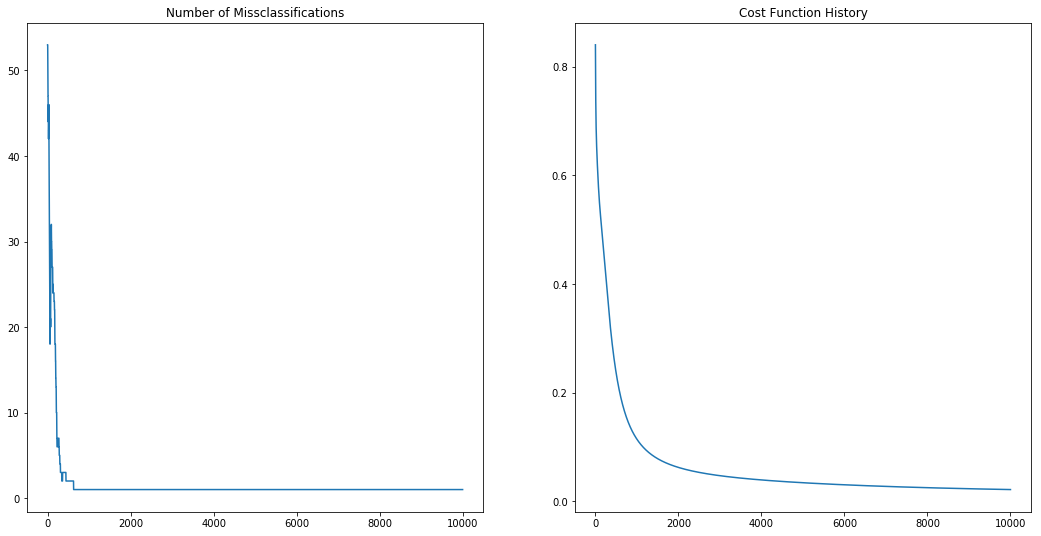

Number of Missclassifications:  1.0
Lowest Costfunction in history 0.0216984796378


In [44]:
#Plots, code straight from ex 1
#Get the data for both
mc = missclass(model, w_hx, x,y)
cfxhx = cost_history(w_hx, softmax)

#Number of iterations
its = np.arange(0,len(w_hx))

# plot cost function history
fig, ax = plt.subplots(1, 2, figsize=(18,9))

# plot function and gradient values
ax[0].plot(its,mc)
ax[0].set_title("Number of Missclassifications")
ax[1].plot(its,cfxhx)
ax[1].set_title("Cost Function History")

plt.show()

#Print the number of misclassifications 
print("Number of Missclassifications: ", mc[-1])
print("Lowest Costfunction in history", cfxhx[-1])

Only one misclassification is pretty darn good! Data seperated using a 3rd order polynomial. 